See 19 in https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/04-One-Dimensional-Kalman-Filters.ipynb

Another useful ref https://stackoverflow.com/questions/33384112/kalman-filter-one-dimensional-several-approaches

In [1]:
from random import Random
import matplotlib.pyplot as plt
%matplotlib inline
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])

def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return gaussian(x, P)

def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P  # posterior variance
    return gaussian(x, P)

In [2]:
random = Random()
random.gauss(mu=0, sigma=1)

-0.32478102276888204

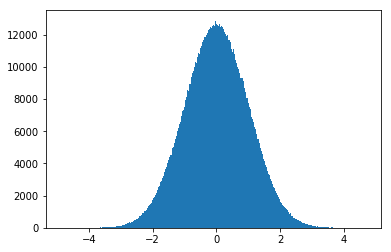

In [3]:
randoms = []
for i in range(1000000):
    randoms.append(random.normalvariate(mu=0, sigma=1))
plt.hist(randoms, bins=300);

The The process variance (`process_var`) tells the filter how much the system is changing over time. If you set this number too low the filter will not be able to react to changes that are happening

In [61]:
def volt(voltage, std):
    return voltage + (random.gauss(mu=0, sigma=1) * std)

voltage_std = .13  # Need to configure/estimate ORIG
process_var = .05**2  # Need to configure/estimate ORIG
#process_var = .5**2  # Need to configure/estimate HIGH
actual_voltage = 16.3

x = gaussian(25., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 50
time = [i for i in range(N)]
readings = [volt(actual_voltage, voltage_std) for i in range(N)]
ps = []
estimates = []

In [62]:
for z in readings:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

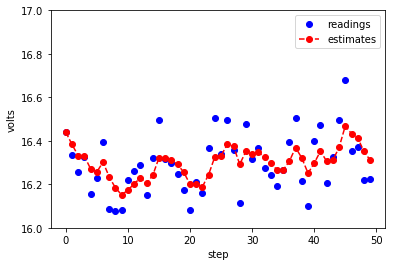

Variance converges to 0.005


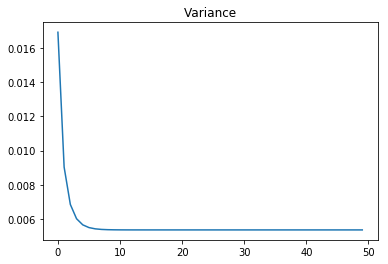

In [63]:
plt.plot(time, readings, 'bo', label='readings') # Dummy reading
plt.plot(time, estimates, 'ro--', label='estimates')
plt.legend()
plt.ylim(16, 17)
plt.xlabel('step')
plt.ylabel('volts')
plt.show()
    
plt.plot(ps)
plt.title('Variance')
print('Variance converges to {:.3f}'.format(ps[-1]))